# Proyek Analisis Data: Air Quality Dataset (Huairou)
- **Nama:** Akhtar Reyhansyach
- **Email:** akhtar.reyhansyach@mail.ugm.ac.id
- **ID Dicoding:** akhtar_rey

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1:
Bagaimana pengaruh Karbon Monoksida (CO) terhadap Suhu Udara di Huairou?
- Pertanyaan 2:
Bagaimana trend Karbon Monoksida (CO) dari tahun 2013-2017 di Huairou?

## Import Semua Packages/Library yang Digunakan

In [ ]:
#Import Library yang dibutuhkan
#untuk kalkulasi
import numpy as np
#untuk pengelolaan dataframe
import pandas as pd
#untuk visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
#Memanggil Data (dari github raw link)
df = pd.read_csv('https://raw.githubusercontent.com/marceloreis/HTI/master/PRSA_Data_20130301-20170228/PRSA_Data_Huairou_20130301-20170228.csv')
#Menampilkan Head Data
df.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
1,2,2013,3,1,1,4.0,4.0,3.0,NaN,100.0,92.0,-2.7,1020.8,-20.5,0.0,NNW,1.5,Huairou
2,3,2013,3,1,2,4.0,4.0,NaN,NaN,100.0,91.0,-3.2,1020.6,-21.4,0.0,NW,1.8,Huairou
3,4,2013,3,1,3,3.0,3.0,3.0,2.0,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,300.0,86.0,-4.1,1022.1,-22.7,0.0,NNW,2.2,Huairou


### Assessing Data

In [ ]:
#Memeriksa tipe data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34111 non-null  float64
 6   PM10     34287 non-null  float64
 7   SO2      34084 non-null  float64
 8   NO2      33425 non-null  float64
 9   CO       33642 non-null  float64
 10  O3       33913 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35011 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35009 non-null  float64
 15  wd       34762 non-null  object 
 16  WSPM     35015 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [ ]:
#Mengecek adanya nilai null
df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       953
PM10        777
SO2         980
NO2        1639
CO         1422
O3         1151
TEMP         51
PRES         53
DEWP         53
RAIN         55
wd          302
WSPM         49
station       0
dtype: int64

In [ ]:
#Mengecek adanya duplikat data
print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 0


In [ ]:
#Memeriksa parameter statistik
df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34111.000000,34287.000000,34084.000000,33425.000000,33642.000000,33913.000000,35013.000000,35011.000000,35011.000000,35009.000000,35015.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,69.626367,91.482690,12.121553,32.497250,1022.554545,59.824713,12.445426,1007.598568,2.238619,0.067940,1.652021
std,10122.249256,1.177213,3.448752,8.800218,6.922285,71.224916,83.289578,18.896912,26.489531,898.738241,54.605746,11.751103,10.022101,14.052541,0.849046,1.199143
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.800000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,17.000000,28.000000,2.000000,12.000000,400.000000,18.000000,2.100000,999.300000,-9.600000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,47.000000,69.000000,4.000000,25.000000,800.000000,49.000000,13.600000,1007.300000,2.700000,0.000000,1.300000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,98.000000,131.000000,14.000000,46.000000,1300.000000,83.000000,22.300000,1015.500000,15.300000,0.000000,2.000000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,762.000000,993.000000,315.000000,231.000000,10000.000000,444.000000,40.300000,1036.500000,29.100000,45.900000,12.900000


In [ ]:
#Memeriksa adanya outlier
def iqr_outlier(data):
    q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    minimum, maximum = q25 - cut_off, q75 + cut_off

    outliers = [x for x in data if x < minimum or x > maximum]
    return outliers

print("Outlier CO:", iqr_outlier(df['CO']))
print("Outlier Temperatur:", iqr_outlier(df['TEMP']))

Outlier CO: []
Outlier Temperatur: []


### Cleaning Data

In [ ]:
#Menangani Missing Value
#Menampilkan missing value
df[df.CO.isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
3,4,2013,3,1,3,3.0,3.0,3.0000,2.0000,NaN,NaN,-3.3,1021.3,-23.7,0.0,NNW,2.4,Huairou
29,30,2013,3,2,5,15.0,18.0,42.2688,26.4837,NaN,56.1204,-4.2,1026.9,-16.4,0.0,WNW,1.4,Huairou
99,100,2013,3,5,3,NaN,51.0,13.0000,28.0000,NaN,91.0000,-0.1,1011.1,-10.4,0.0,WNW,1.6,Huairou
110,111,2013,3,5,14,NaN,146.0,84.0000,83.0000,NaN,91.0000,14.3,1004.5,-8.4,0.0,ESE,1.7,Huairou
178,179,2013,3,8,10,173.0,193.0,105.3864,79.4511,NaN,68.0000,17.8,997.6,-3.6,0.0,SSE,2.8,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34879,34880,2017,2,21,7,NaN,NaN,NaN,NaN,NaN,NaN,-5.2,1023.6,-13.8,0.0,N,0.8,Huairou
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-3.6,1023.8,-15.3,0.0,NW,1.3,Huairou
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.6,1022.9,-15.3,0.0,ESE,1.7,Huairou
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,0.3,1021.3,-14.9,0.0,SE,1.1,Huairou


In [ ]:
#Menghapus row dengan nilai NaN
df.dropna()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,7.0,7.0,3.0,2.0,100.0,91.0,-2.3,1020.3,-20.7,0.0,WNW,3.1,Huairou
5,6,2013,3,1,5,4.0,4.0,3.0,3.0,200.0,85.0,-4.2,1022.3,-24.5,0.0,N,4.3,Huairou
6,7,2013,3,1,6,3.0,6.0,33.0,7.0,300.0,82.0,-5.9,1023.1,-21.9,0.0,WNW,0.6,Huairou
7,8,2013,3,1,7,3.0,10.0,13.0,13.0,400.0,71.0,-2.7,1024.3,-23.2,0.0,NNE,3.4,Huairou
8,9,2013,3,1,8,3.0,13.0,34.0,38.0,800.0,45.0,-1.6,1025.2,-23.5,0.0,NNE,4.6,Huairou
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,16.0,28.0,2.0,19.0,300.0,95.0,9.9,1008.6,-14.1,0.0,WNW,1.8,Huairou
35060,35061,2017,2,28,20,21.0,34.0,4.0,24.0,500.0,80.0,9.5,1008.9,-14.4,0.0,SSW,1.3,Huairou
35061,35062,2017,2,28,21,17.0,33.0,2.0,39.0,900.0,60.0,8.4,1009.3,-14.6,0.0,SE,1.5,Huairou
35062,35063,2017,2,28,22,11.0,29.0,3.0,32.0,1400.0,69.0,8.3,1009.5,-14.7,0.0,ENE,3.2,Huairou


In [ ]:
#Karena assessing hanya ada nilai null dan tidak ada duplikat atau outlier, maka hanya perlu melakukan dropna()

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
#Pertanyaan 1: Bagaimana pengaruh Karbon Monoksida (CO) terhadap Suhu Udara di Huairou?
#Menemukan Hubungan
df[['CO','TEMP']].corr()
#Hasil menunjukkan korelasi antara CO dan TEMP adalah -0.2610 atau -26%
#Berarti CO dan TEMP memiliki korelasi negatif dengan pengaruh 26%
#Berarti apabila CO naik, maka TEMP akan turun sebanyak 26% dan sebaliknya

,CO,TEMP
CO,1.00000,-0.26106
TEMP,-0.26106,1.00000


In [ ]:
#Pertanyaan 2: Bagaimana trend Karbon Monoksida (CO) dari tahun 2013-2017 di Huairou?
#Melihat nilai aggregasi
df.groupby(by="year").agg({
    "CO": ["mean"],
    "TEMP": ["mean"]
})
#Mengambil nilai per tahun menggunakan mean
#Terlihat Trend CO menurun secara signifikan pada tahun 2016 dan meningkat signifikan pada tahun 2017

,CO,TEMP
,mean,mean
year,,
2013,1004.834009,14.660335
2014,1064.352183,12.802638
2015,1041.741950,12.455540
2016,928.211704,12.405444
2017,1318.188354,-1.171746


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh Karbon Monoksida (CO) terhadap Suhu Udara di Huairou?

<function matplotlib.pyplot.show(close=None, block=None)>

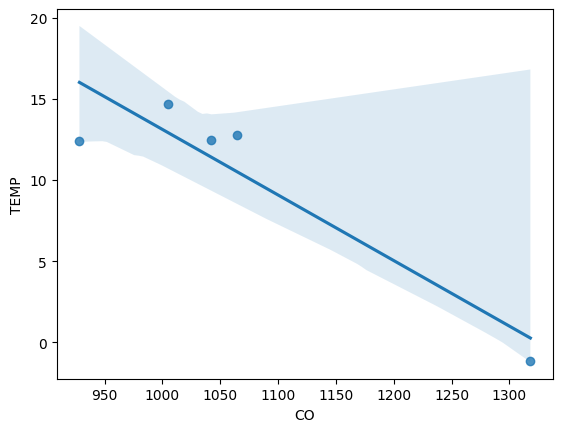

In [ ]:
#Mendeklarasikan variable untuk mempermudah coding
karbon = df.groupby("year").agg({"CO":"mean"})
suhu = df.groupby("year").agg({"TEMP": "mean"})

#Menampilkan Plot Regresi untuk menunjukkan hubungan antara CO dan TEMP
sns.regplot(x=karbon, y=suhu)
plt.show

### Pertanyaan 2: Bagaimana trend Karbon Monoksida (CO) dari tahun 2013-2017 di Huairou?

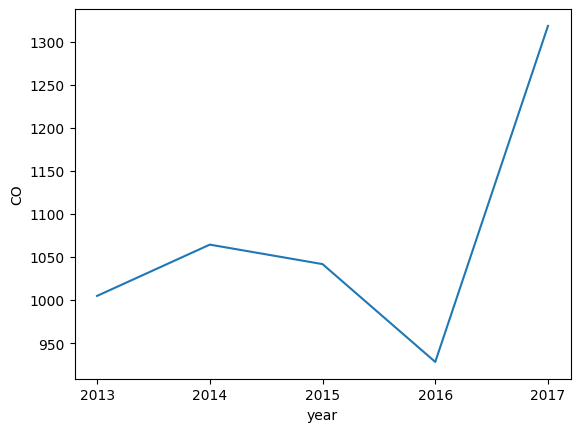

In [ ]:
#Menampilkan plot tren menggunakan line chart
#Memasukkan nilai x dan y
sns.lineplot(data=karbon, x='year', y='CO')
#Memastikan data tiap tahun masuk dan agar tampilan nilainya sesuai dengan data (tidak desimal)
plt.xticks(df['year'].unique())
#Menampilkan plot
plt.show()

## Conclusion

- Conclution pertanyaan 1:
Pengaruh Karbon Monoksida terhadap Temperatur/Suhu Udara di Huairou adalah -26%,
yang berarti berpengaruh kecil dan negatif (apabila karbon meningkat maka suhu turun)

- Conclution pertanyaan 2:
Trend Karbon Monoksida di Huairou stabil dari Tahun 2013-2015 dan menurun signifikan pada 2016 lalu meningkat signifikan pada 2017

In [ ]:
df.to_csv("all_data.csv", index=False)